In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
housing=pd.read_csv("C:/Users/dbda/Desktop/ML/Day1/Housing.csv")

In [3]:
housing.dtypes

price       float64
lotsize       int64
bedrooms      int64
bathrms       int64
stories       int64
driveway     object
recroom      object
fullbase     object
gashw        object
airco        object
garagepl      int64
prefarea     object
dtype: object

Text(0, 0.5, 'Price')

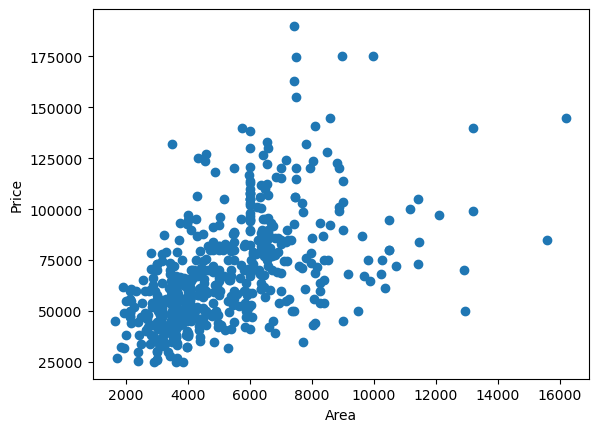

In [4]:
plt.scatter(housing['lotsize'],housing["price"])
plt.xlabel("Area")
plt.ylabel("Price")

In [5]:
housing['lotsize'].corr(housing['price'])

0.535795672432184

In [6]:
X = housing[['lotsize']] # X must be 2D, else you can't plot it.
y = housing['price']     # y is 1-D
lr = LinearRegression()  #Instance of class Linear Regression
lr.fit(X,y)
print(lr.intercept_, lr.coef_)    #price = (lr.coef_*lotsize) + lr.intercept_

34136.19156491507 [6.59876759]


For lotsize = 4000, we can compute prediction of price as


In [7]:
34136.19156491507 + 6.59876759 * 4160


61587.06473931507

In [8]:
X = housing[['lotsize', 'bedrooms']] # X must be 2D, else you can't plot it.
y = housing['price']     # y is 1-D
lr = LinearRegression()  #Instance of class Linear Regression
lr.fit(X,y)
print(lr.intercept_, lr.coef_)    #price = (lr.coef_*lotsize) + lr.intercept_

5612.599731057468 [6.05302208e+00 1.05673515e+04]


In [9]:
ycap1 = 34136.19156491507 +  housing['lotsize']*6.59876759
s1 = np.sum((y-ycap1)**2)
s1

277043862881.1533

In [10]:
ycap = 5612.599731057468 +6.05302208e+00 * housing['lotsize']+ 1.05673515e+04*housing['bedrooms']
ycap

0      72724.833399
1      50959.391051
2      55836.901796
3      77567.251063
4      65244.523160
           ...     
541    66369.160215
542    73632.786711
543    73632.786711
544    73632.786711
545    73632.786711
Length: 546, dtype: float64

In [11]:
s2 = np.sum((y-ycap)**2)
s2

244715087228.70367

In [12]:
s1 - s2

32328775652.449646

In [13]:
X = housing[['lotsize', 'bedrooms', 'bathrms']] # X must be 2D, else you can't plot it.
y = housing['price']     # y is 1-D
lr = LinearRegression()  #Instance of class Linear Regression
lr.fit(X,y)
print(lr.intercept_, lr.coef_)    #price = (lr.coef_*lotsize) + lr.intercept_

-2418.292616740713 [5.41120044e+00 5.82680241e+03 1.97502101e+04]


In [14]:
ycap2 = -2418.292616740713 + housing['lotsize']*5.41120044e+00 + housing['bedrooms']* 5.82680241e+03 + housing['bathrms']*1.97502101e+04
ycap2


0      66467.847287
1      50630.324063
2      51370.598060
3      70796.807639
4      63400.757102
           ...     
541    80536.296925
542    87029.737453
543    87029.737453
544    87029.737453
545    67279.527353
Length: 546, dtype: float64

In [15]:
s3 = np.sum((y-ycap2)**2) #Residual sum of squares
s3

199628303501.08502

In [16]:
print("resedual sum 1",s1)
print("resedual sum 2",s2)
print("resedual sum 3",s3)


resedual sum 1 277043862881.1533
resedual sum 2 244715087228.70367
resedual sum 3 199628303501.08502


### Increased variables give higher correlation => Lower residual sum of squares

In [17]:
#Converting string columns into numeric type
housing['driveway'] = np.where(housing['driveway'] == 'yes', 1,0)
housing['airco'] = np.where(housing['airco'] == 'yes', 1,0)

In [18]:
X = housing[['lotsize', 'bedrooms', 'bathrms', 'driveway']] # X must be 2D, else you can't plot it.
y = housing['price']     # y is 1-D
lr = LinearRegression()  #Instance of class Linear Regression
lr.fit(X,y)
print(lr.intercept_, lr.coef_)    #price = (lr.coef_*lotsize) + lr.intercept_

-11501.414051187283 [4.78495477e+00 6.19654687e+03 1.96887926e+04 1.31448062e+04]


In [19]:
ycap3 = -11501.414051187283 + housing['lotsize'] * 4.78495477e+00 + housing['bedrooms']*6.19654687e+03 + housing['bathrms']*1.96887926e+04 + housing['driveway']*1.31448062e+04
s4 = np.sum((y-ycap3)**2)

In [26]:
X = housing[['lotsize', 'bedrooms', 'bathrms', 'driveway', 'airco']] # X must be 2D, else you can't plot it.
y = housing['price']     # y is 1-D
lr = LinearRegression()  #Instance of class Linear Regression
lr.fit(X,y)
print(lr.intercept_, lr.coef_)    #price = (lr.coef_*lotsize) + lr.intercept_

-7677.399419185327 [4.20951767e+00 5.27941463e+03 1.80030817e+04 1.20181932e+04
 1.57620271e+04]


In [27]:
ycap5 = -7677.399419185327 + housing['lotsize']*4.20951767e+00 + housing['bedrooms']* 5.27941463e+03 +housing['bathrms']*1.80030817e+04 + housing['driveway']* 1.20181932e+04
+ housing['airco']* 1.57620271e+04

0          0.0000
1          0.0000
2          0.0000
3          0.0000
4          0.0000
          ...    
541    15762.0271
542    15762.0271
543    15762.0271
544    15762.0271
545    15762.0271
Name: airco, Length: 546, dtype: float64

In [28]:
s5 = np.sum((y-ycap5)**2) #Residual sum of squares
s5

205142294751.38327

In [29]:
print(s1)
print(s2)
print(s3)
print(s4)
print(s5)

277043862881.1533
244715087228.70367
199628303501.08502
189190016788.4398
205142294751.38327


### You can't run all 800 columns one at a time. All of them can be done at once in a much simpler fashion

In [21]:
#Predict function
ycap = lr.predict(X)


In [22]:
sn = np.sum((y - ycap)**2)
sn

189190016788.43976

In [30]:
print(s1)
print(s2)
print(s3)
print(s4)
print(s5)
print(sn)

277043862881.1533
244715087228.70367
199628303501.08502
189190016788.4398
205142294751.38327
189190016788.43976


### One Hot Encoding / Dummying

In [35]:
dum_housing = pd.get_dummies(housing, drop_first = True)
#Creates two columns for each column containing yes/no values
#Drops the first column i.e. recroom_no, fullbase_no, etc.
#X1 = dum_housing.iloc[:, 1:]
X1 = dum_housing.drop('price', axis = 1)
y = dum_housing['price']


In [41]:
dum_housing = pd.get_dummies(housing, drop_first = True)
#Creates two columns for each column containing yes/no values
#Drops the first column i.e. recroom_no, fullbase_no, etc.
#X1 = dum_housing.iloc[:, 1:]
X1 = dum_housing.drop('price', axis = 1)
y = dum_housing['price']
lr.fit(X1,y)
#get the all ycap value in one line
ycapnew=lr.predict(X1)
#residual sum of square  
sumnew=np.sum((y-ycapnew)**2)
sumnew

127025071644.46799

### Small Dataset

In [24]:
x = np.array([34,56,87,109,120])
y = np.array([340,500,879,1090,1230])
lr.fit(x.reshape(-1,1),y)

LinearRegression()

In [25]:
lr.intercept_, lr.coef_

(-47.00935301847403, array([10.52720878]))